<a href="https://colab.research.google.com/github/azkadzafif/AnalitikaData/blob/main/Azka_Dzafif_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

In [ ]:
!gdown --id (id link)

In [4]:
import pandas as pd
dataset = pd.read_csv('/content/LaLiga_Matches_1995-2021.csv')
dataset

,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR
0,1995-96,2/9/1995,La Coruna,Valencia,3,0,H,2.0,0.0,H
1,1995-96,2/9/1995,Sp Gijon,Albacete,3,0,H,3.0,0.0,H
2,1995-96,3/9/1995,Ath Bilbao,Santander,4,0,H,2.0,0.0,H
3,1995-96,3/9/1995,Ath Madrid,Sociedad,4,1,H,1.0,1.0,D
4,1995-96,3/9/1995,Celta,Compostela,0,1,A,0.0,0.0,D
...,...,...,...,...,...,...,...,...,...,...
10039,2020-21,22/05/2021,Osasuna,Sociedad,0,1,A,0.0,0.0,D
10040,2020-21,22/05/2021,Real Madrid,Villarreal,2,1,H,0.0,1.0,A
10041,2020-21,22/05/2021,Valladolid,Ath Madrid,1,2,A,1.0,0.0,H
10042,2020-21,23/05/2021,Granada,Getafe,0,0,D,0.0,0.0,D


## 2. Exploratory Data

In [5]:
dataset.shape

(10044, 10)

In [6]:
dataset.columns

Index(['Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR'],
      dtype='object')

In [7]:
dataset.dtypes

Season       object
Date         object
HomeTeam     object
AwayTeam     object
FTHG          int64
FTAG          int64
FTR          object
HTHG        float64
HTAG        float64
HTR          object
dtype: object

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10044 entries, 0 to 10043
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Season    10044 non-null  object 
 1   Date      10044 non-null  object 
 2   HomeTeam  10044 non-null  object 
 3   AwayTeam  10044 non-null  object 
 4   FTHG      10044 non-null  int64  
 5   FTAG      10044 non-null  int64  
 6   FTR       10044 non-null  object 
 7   HTHG      10042 non-null  float64
 8   HTAG      10042 non-null  float64
 9   HTR       10042 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 784.8+ KB


In [9]:
dataset.nunique()

Season        26
Date        2636
HomeTeam      48
AwayTeam      48
FTHG          11
FTAG           9
FTR            3
HTHG           7
HTAG           7
HTR            3
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

In [10]:
dataset.isnull().sum()

Season      0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        2
HTAG        2
HTR         2
dtype: int64

In [12]:
dataset['HTHG'].dtypes

dtype('float64')

In [13]:
dataset['HTAG'].dtypes

dtype('float64')

In [14]:
dataset['HTR'].dtypes

dtype('O')

In [15]:
dataset['Date'].dtypes

dtype('O')

Perform imputer to handle missing value in numerical data

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

Using drop column tohandle missing value on categorical or object data

In [19]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Season      0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

In [20]:
dataset = dataset.drop('Date', axis=1)
dataset

,Season,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1995-96,La Coruna,Valencia,3,0,H
1,1995-96,Sp Gijon,Albacete,3,0,H
2,1995-96,Ath Bilbao,Santander,4,0,H
3,1995-96,Ath Madrid,Sociedad,4,1,H
4,1995-96,Celta,Compostela,0,1,A
...,...,...,...,...,...,...
10039,2020-21,Osasuna,Sociedad,0,1,A
10040,2020-21,Real Madrid,Villarreal,2,1,H
10041,2020-21,Valladolid,Ath Madrid,1,2,A
10042,2020-21,Granada,Getafe,0,0,D


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

In [21]:
dataset.describe()

,FTHG,FTAG
count,10044.000000,10044.000000
mean,1.561928,1.118877
std,1.307706,1.116444
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,8.000000


<Axes: >

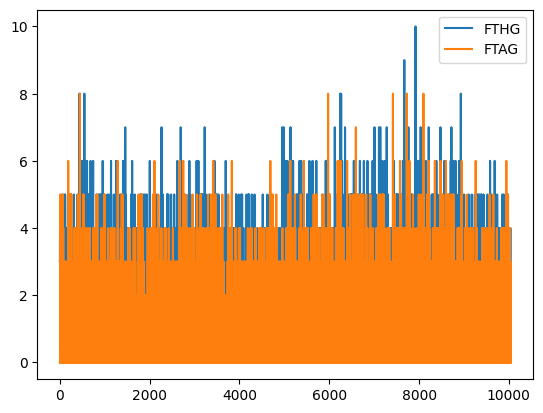

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

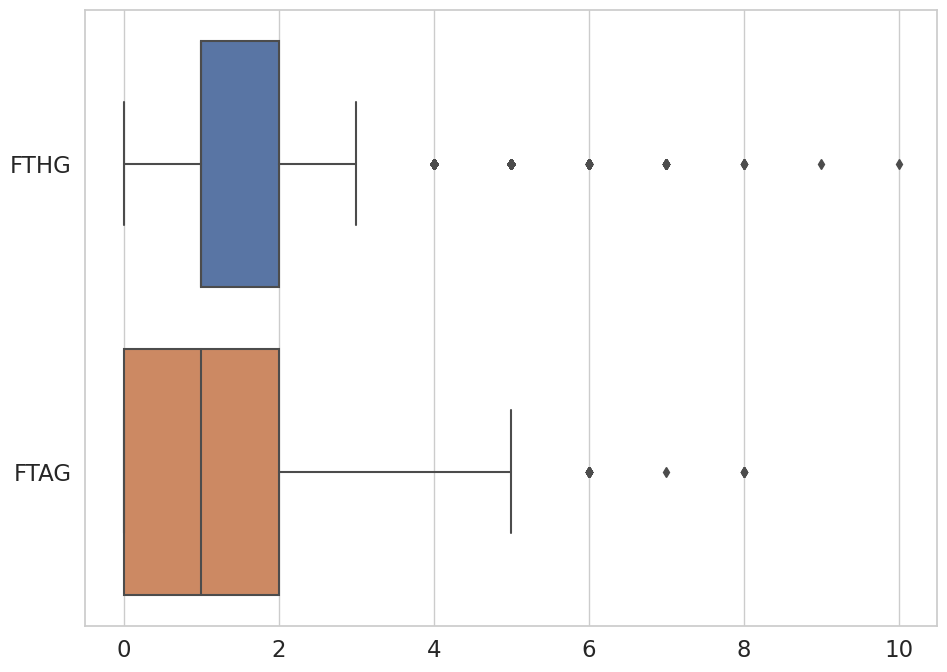

In [23]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

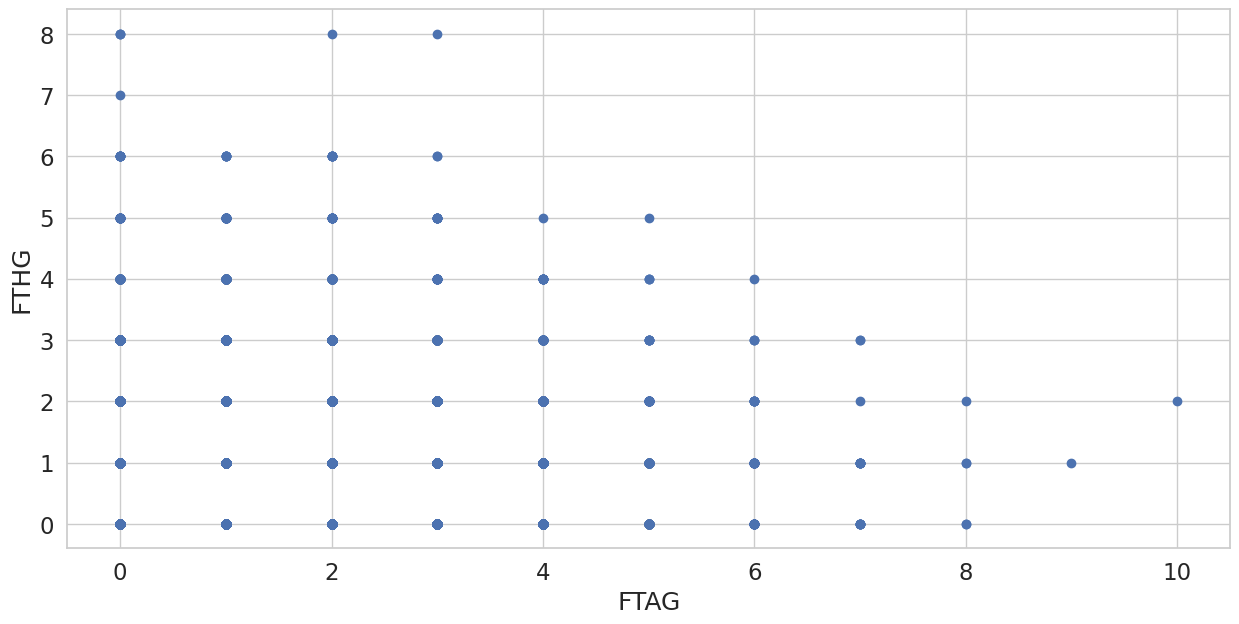

In [28]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['FTHG'], dataset['FTAG'])
 
# x-axis label
ax.set_xlabel('FTAG')
 
# y-axis label
ax.set_ylabel('FTHG')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

In [29]:
import sklearn

# IQR FTHG
Q1 = np.percentile(dataset['FTHG'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['FTHG'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (10044, 6)


In [31]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['FTHG'] > upper].index
outliers_lower = dataset[dataset['FTHG'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (9205, 6)


In [32]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['FTAG'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['FTAG'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (9205, 6)


In [33]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['FTAG'] > upper].index
outliers_lower = dataset[dataset['FTAG'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (9176, 6)


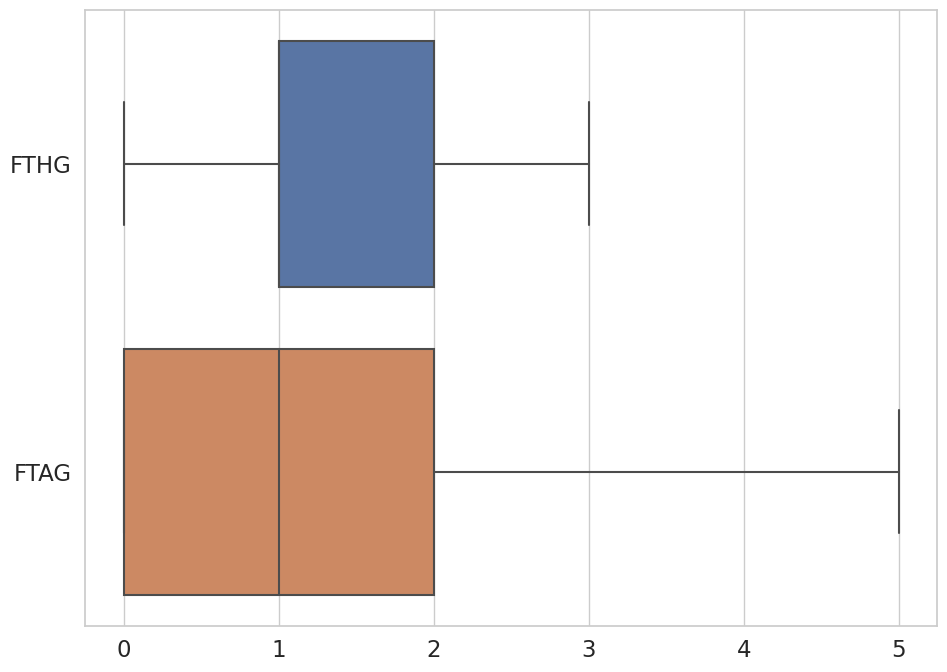

In [34]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

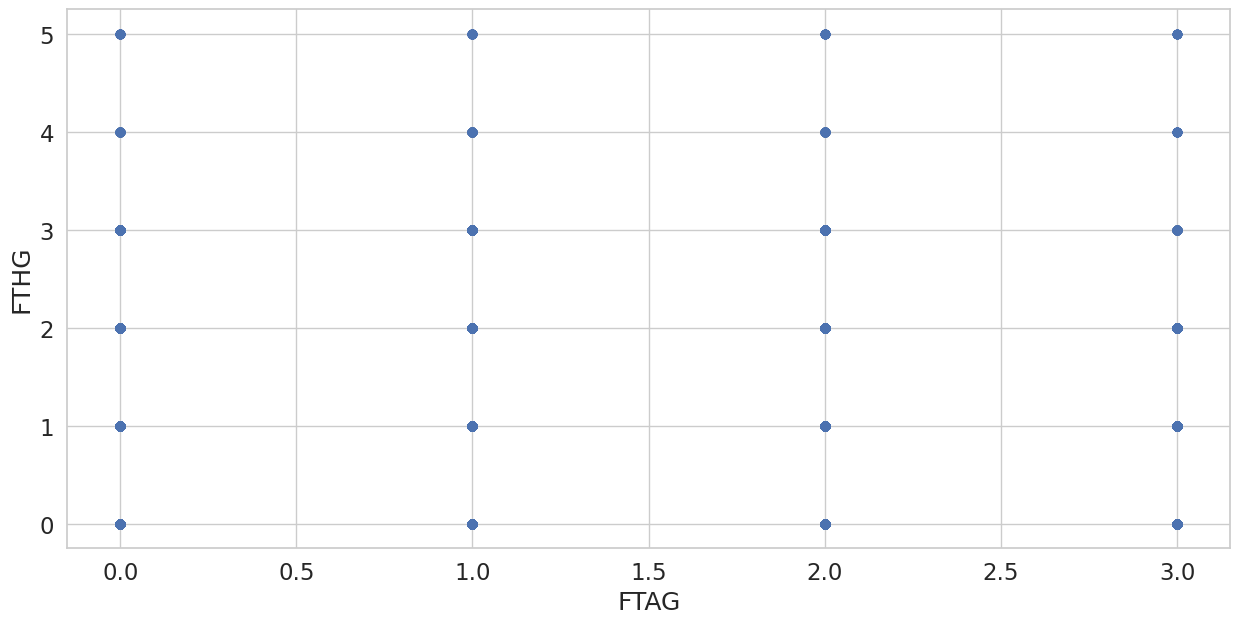

In [35]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['FTHG'], dataset['FTAG'])
 
# x-axis label
ax.set_xlabel('FTAG')
 
# y-axis label
ax.set_ylabel('FTHG')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

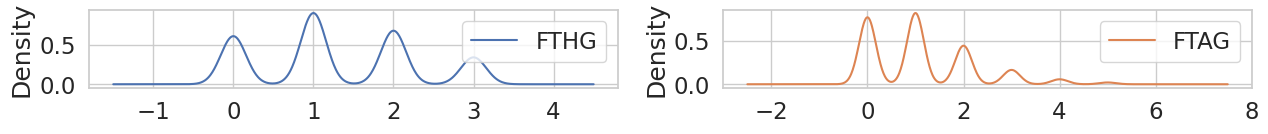

In [36]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

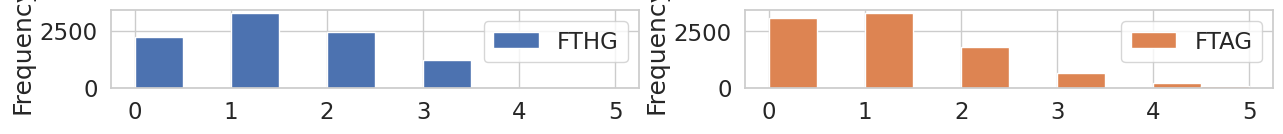

In [38]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

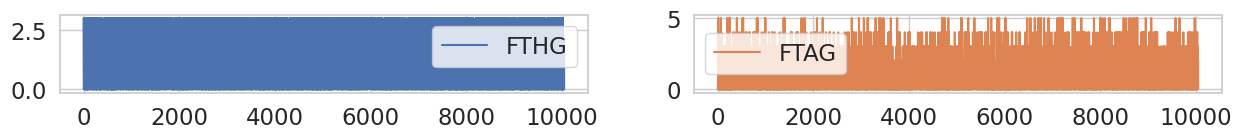

In [37]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

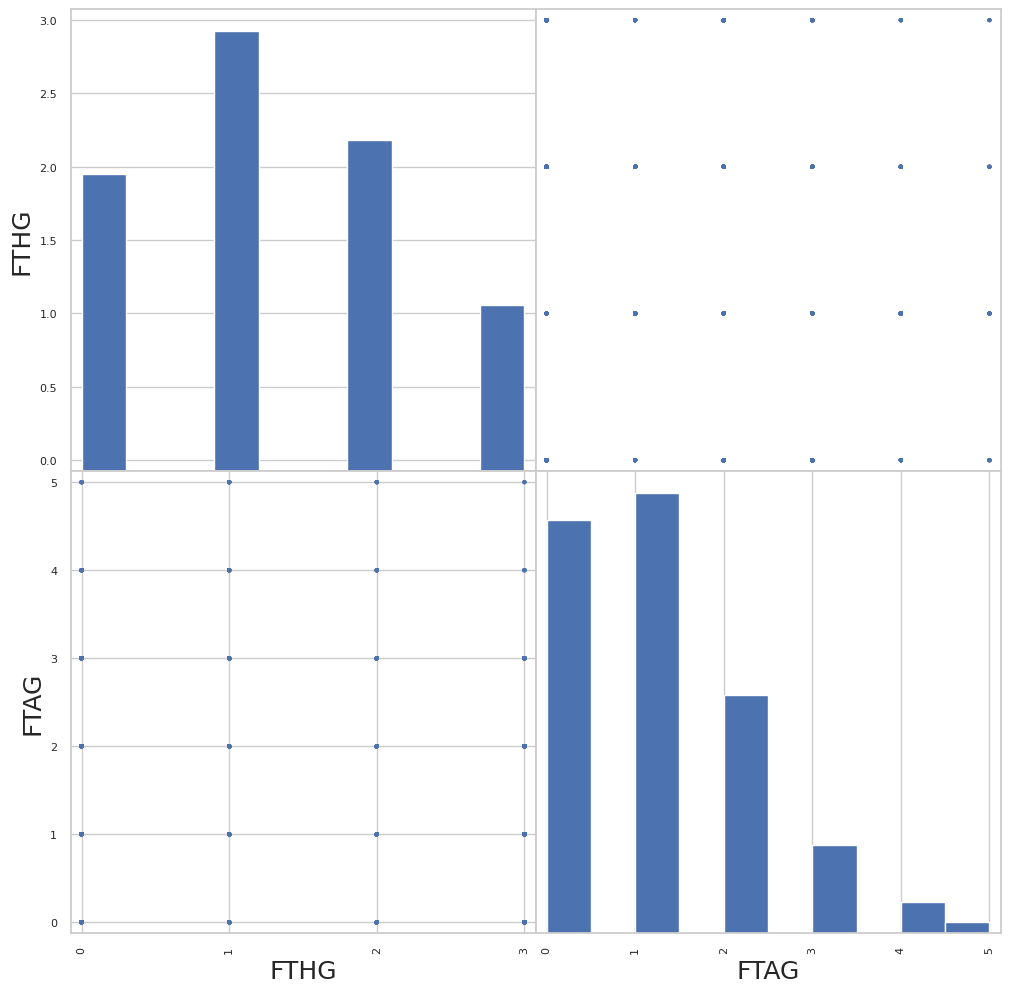

In [39]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

<ipython-input-40-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


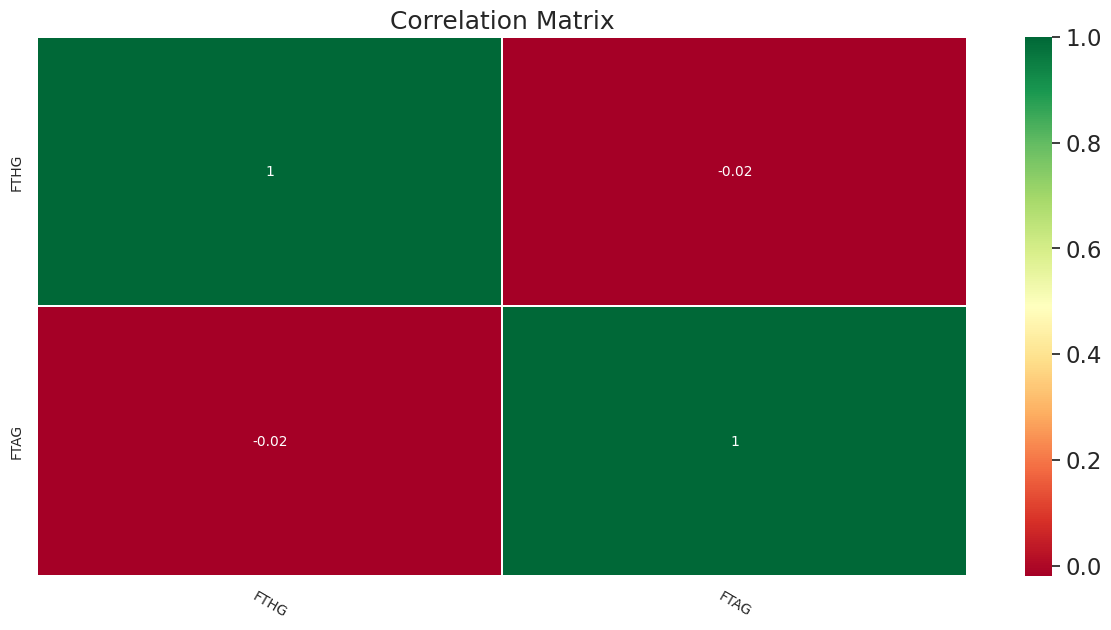

In [40]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [46]:
x = dataset.drop('FTR', axis=1)
x

,Season,HomeTeam,AwayTeam,FTHG,FTAG
0,1995-96,La Coruna,Valencia,3,0
1,1995-96,Sp Gijon,Albacete,3,0
4,1995-96,Celta,Compostela,0,1
5,1995-96,Espanol,Salamanca,3,1
6,1995-96,Merida,Betis,1,1
...,...,...,...,...,...
10039,2020-21,Osasuna,Sociedad,0,1
10040,2020-21,Real Madrid,Villarreal,2,1
10041,2020-21,Valladolid,Ath Madrid,1,2
10042,2020-21,Granada,Getafe,0,0


Choose feature Type as a label

In [47]:
y = dataset["FTR"]
y

0        H
1        H
4        A
5        H
6        D
        ..
10039    A
10040    H
10041    A
10042    D
10043    H
Name: FTR, Length: 9176, dtype: object

In [48]:
y.values.reshape(-1,1)

array([['H'],
       ['H'],
       ['A'],
       ...,
       ['A'],
       ['D'],
       ['H']], dtype=object)

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [49]:
x = pd.get_dummies(x)
x

,FTHG,FTAG,Season_1995-96,Season_1996-97,Season_1997-98,Season_1998-99,Season_1999-2000,Season_2000-01,Season_2001-02,Season_2002-03,...,AwayTeam_Sociedad,AwayTeam_Sp Gijon,AwayTeam_Tenerife,AwayTeam_Valencia,AwayTeam_Valladolid,AwayTeam_Vallecano,AwayTeam_Villareal,AwayTeam_Villarreal,AwayTeam_Xerez,AwayTeam_Zaragoza
0,3,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10039,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10040,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10041,1,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
x.shape

(9176, 124)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [51]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,1.738766,-1.024163,4.571626,-0.219014,-0.198545,-0.197951,-0.198545,-0.193751,-0.200905,-0.200611,...,-0.215161,-0.13151,-0.110151,4.294261,-0.179686,-0.147737,-0.040465,-0.201491,-0.043082,-0.177411
1,1.738766,-1.024163,4.571626,-0.219014,-0.198545,-0.197951,-0.198545,-0.193751,-0.200905,-0.200611,...,-0.215161,-0.13151,-0.110151,-0.232869,-0.179686,-0.147737,-0.040465,-0.201491,-0.043082,-0.177411
2,-1.323794,-0.103901,4.571626,-0.219014,-0.198545,-0.197951,-0.198545,-0.193751,-0.200905,-0.200611,...,-0.215161,-0.13151,-0.110151,-0.232869,-0.179686,-0.147737,-0.040465,-0.201491,-0.043082,-0.177411
3,1.738766,-0.103901,4.571626,-0.219014,-0.198545,-0.197951,-0.198545,-0.193751,-0.200905,-0.200611,...,-0.215161,-0.13151,-0.110151,-0.232869,-0.179686,-0.147737,-0.040465,-0.201491,-0.043082,-0.177411
4,-0.302941,-0.103901,4.571626,-0.219014,-0.198545,-0.197951,-0.198545,-0.193751,-0.200905,-0.200611,...,-0.215161,-0.13151,-0.110151,-0.232869,-0.179686,-0.147737,-0.040465,-0.201491,-0.043082,-0.177411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9171,-1.323794,-0.103901,-0.218741,-0.219014,-0.198545,-0.197951,-0.198545,-0.193751,-0.200905,-0.200611,...,4.647686,-0.13151,-0.110151,-0.232869,-0.179686,-0.147737,-0.040465,-0.201491,-0.043082,-0.177411
9172,0.717913,-0.103901,-0.218741,-0.219014,-0.198545,-0.197951,-0.198545,-0.193751,-0.200905,-0.200611,...,-0.215161,-0.13151,-0.110151,-0.232869,-0.179686,-0.147737,-0.040465,4.962992,-0.043082,-0.177411
9173,-0.302941,0.816362,-0.218741,-0.219014,-0.198545,-0.197951,-0.198545,-0.193751,-0.200905,-0.200611,...,-0.215161,-0.13151,-0.110151,-0.232869,-0.179686,-0.147737,-0.040465,-0.201491,-0.043082,-0.177411
9174,-1.323794,-1.024163,-0.218741,-0.219014,-0.198545,-0.197951,-0.198545,-0.193751,-0.200905,-0.200611,...,-0.215161,-0.13151,-0.110151,-0.232869,-0.179686,-0.147737,-0.040465,-0.201491,-0.043082,-0.177411


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [52]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9171,0.000000,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9172,0.666667,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9173,0.333333,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9174,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4.3 Splitting**

In [53]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.8, random_state=1, stratify=y)

In [54]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({'H': 3156, 'A': 2144, 'D': 2040})
Test distribution Counter({'H': 789, 'A': 537, 'D': 510})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [55]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [56]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)


In [57]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [58]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

1.0


[[537   0   0]
 [  0 510   0]
 [  0   0 789]]


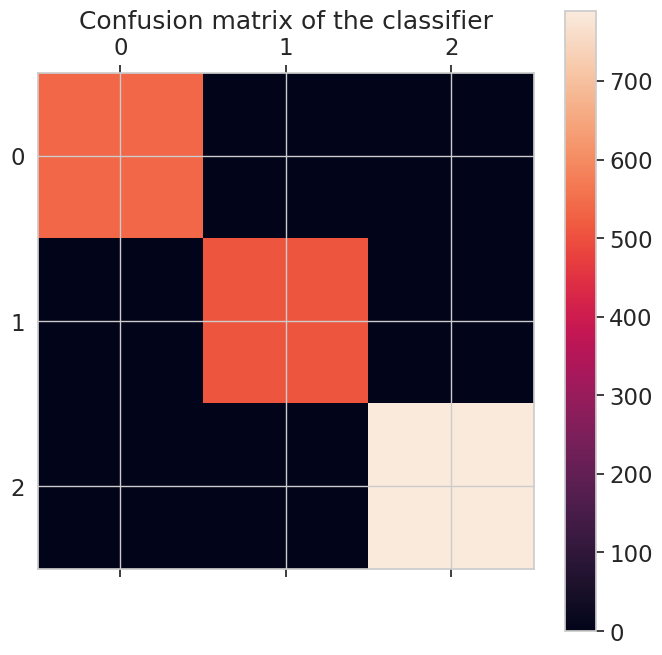

In [59]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [60]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00       537
           D       1.00      1.00      1.00       510
           H       1.00      1.00      1.00       789

    accuracy                           1.00      1836
   macro avg       1.00      1.00      1.00      1836
weighted avg       1.00      1.00      1.00      1836

